문제 정의 : 전국에서 신도림동 연령별 인구 구조와 가장 형태가 비슷한 

<알고리즘 설계> <br>
1. 데이터를 읽어온다.
2. 궁금한 지역의 이름을 입력 받는다.
3. 궁금한 지역의 인구 구조를 저장한다.
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화 한다.

한글 깨짐 방지

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 폰트 컴퓨터 위치에 따라 설정 해야함
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1.데이터를 읽어 온다.

In [2]:
import csv
f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data)

for row in data:
  print(row)

Output hidden; open in https://colab.research.google.com to view.

2.궁금한 지역의 이름을 입력 받는다.

In [ ]:
import csv
f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

for row in data:
  if name in row[0]:
    for i in row [3:]:
      home.append(int(i.replace(',','')))
      
  
  print(home)

3. 궁금한 지역의 인구 구조를 저장한다.

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 심도림동
[326, 334, 406, 413, 389, 408, 417, 434, 411, 387, 420, 383, 354, 357, 340, 338, 349, 339, 407, 380, 390, 453, 424, 516, 451, 466, 448, 484, 471, 476, 558, 541, 579, 619, 638, 740, 756, 792, 745, 789, 671, 687, 700, 636, 726, 691, 657, 619, 649, 585, 579, 470, 522, 534, 563, 445, 511, 569, 572, 513, 532, 456, 426, 497, 379, 384, 399, 279, 289, 276, 268, 271, 223, 170, 150, 154, 177, 140, 126, 114, 121, 97, 86, 80, 59, 48, 44, 43, 28, 29, 22, 15, 13, 12, 5, 8, 5, 4, 2, 3, 7]


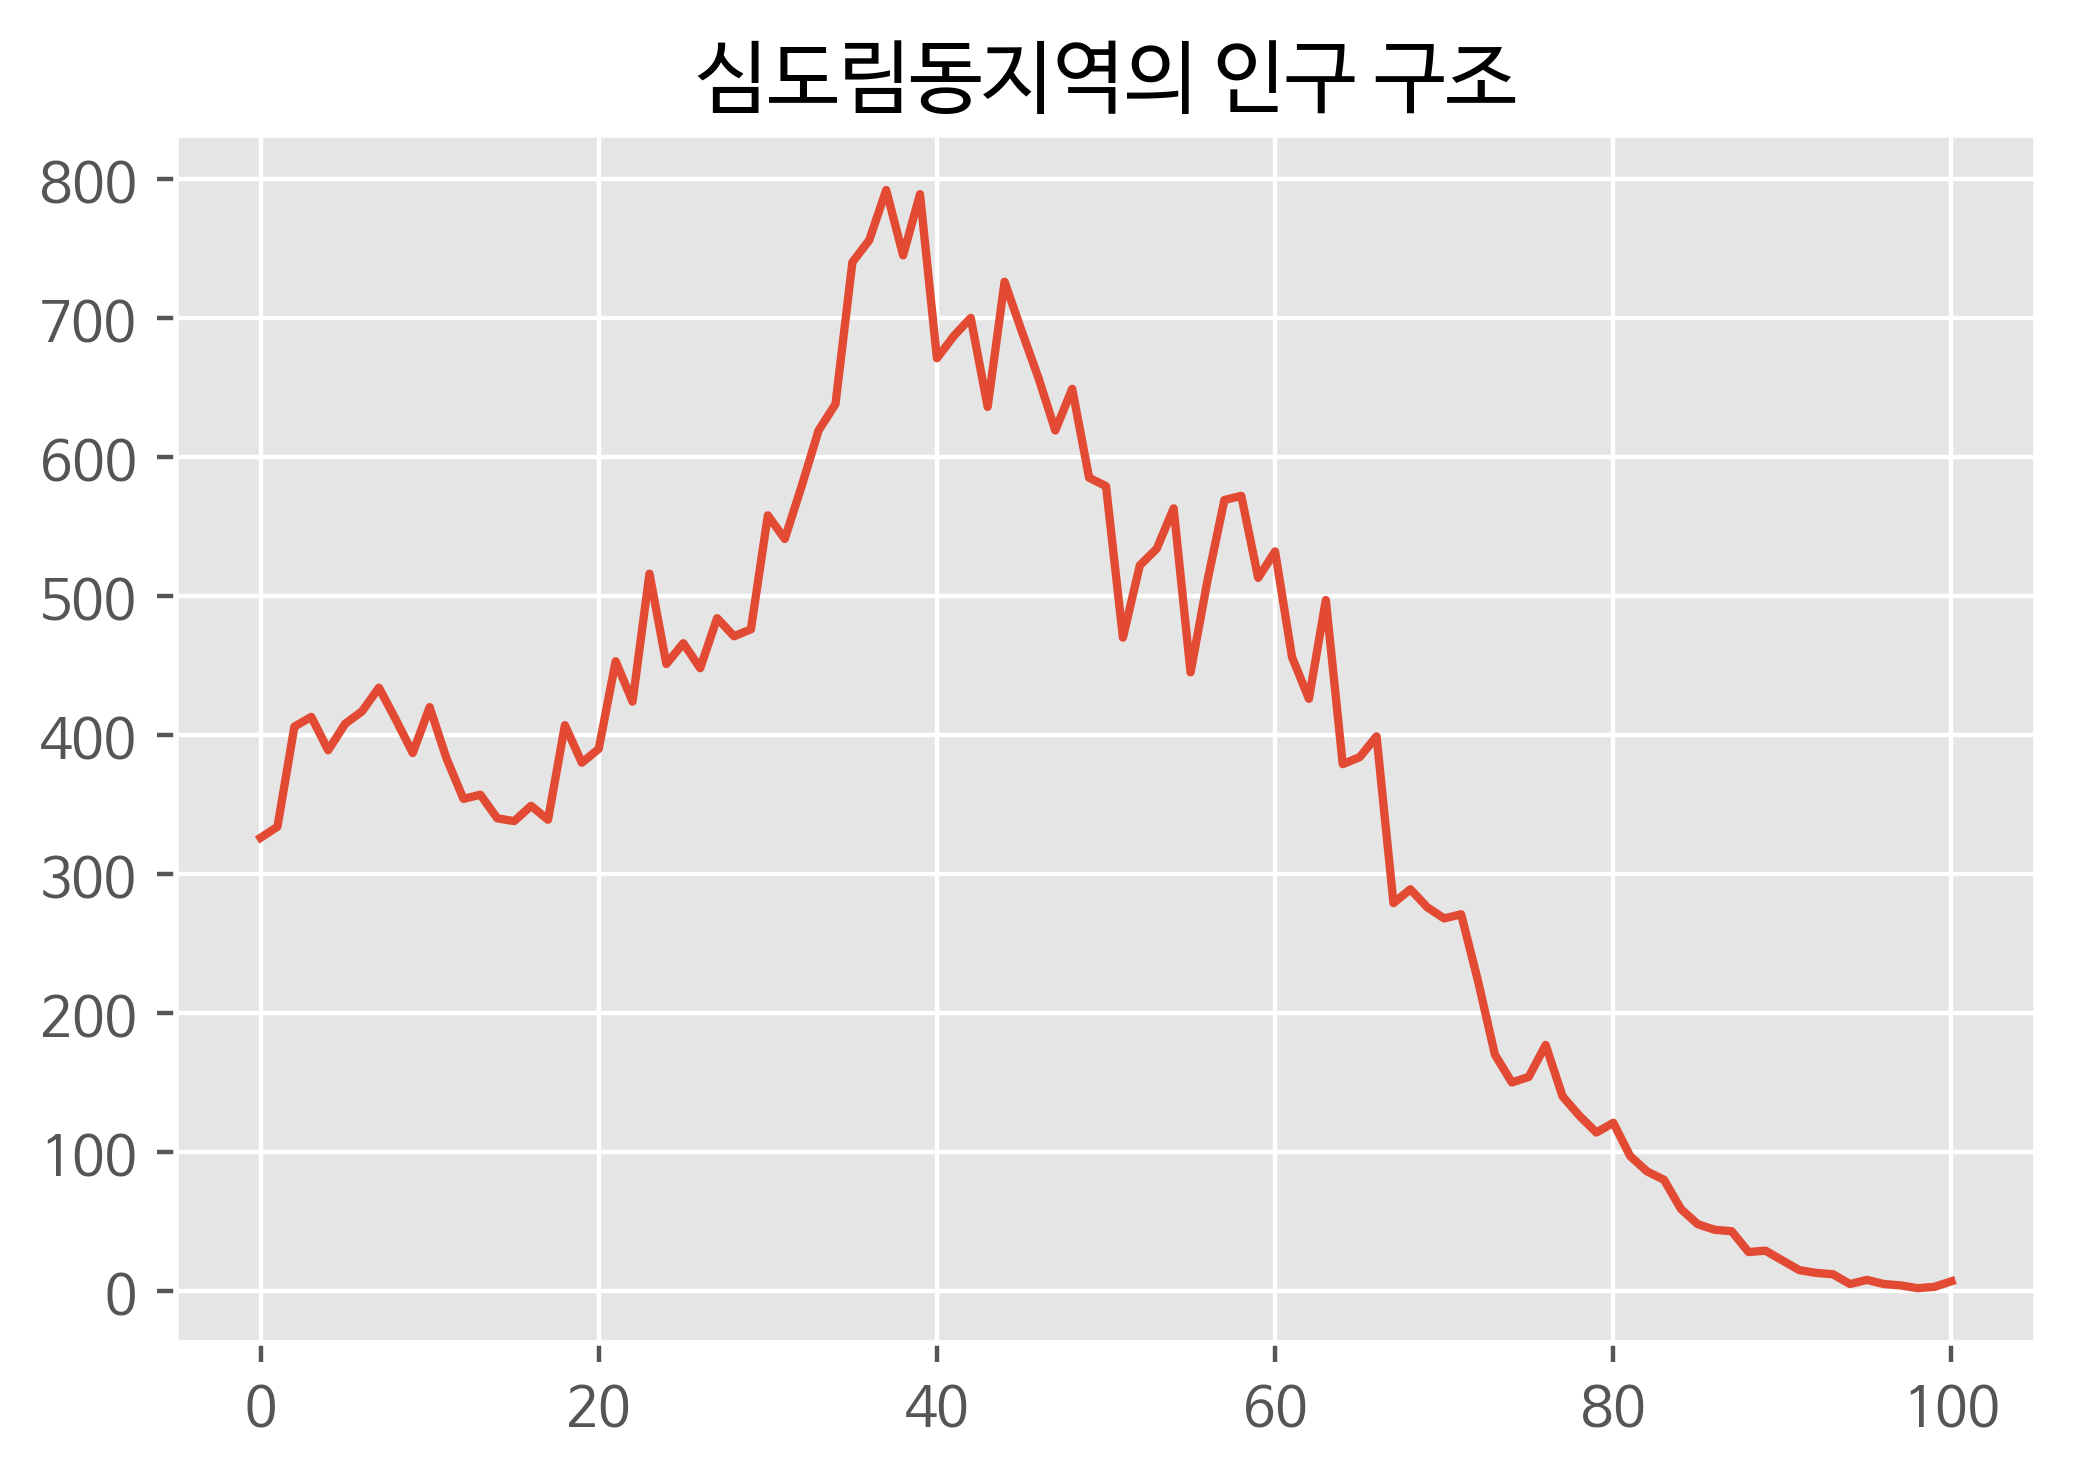

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt


f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거


name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) # numpy 배열로 저장할 때 데이터 타입 int 로

print(home)

plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + '지역의 인구 구조')

plt.plot(home)
plt.show()

4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.

*   전국의 모든 지역 중 한곳 (B)을 선택 한다.
*   궁금한 지역 A의 0세 인구수에서 B의 0세 인구수를 뺀다
*   100세 이상 인구수에 해당 하는 값까지 반복한 후 각각의 차이를 모두 더한다.
*   전국의 모든 지역에 대해 반복하며, 그 차이가 가장 작은 지역을 찾는다.

궁금한 지역 A의 0세 인구 비율에서 B의 0세 인구 비율을 뺀다.

In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt


f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data) # 추가

name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2]) # numpy.sum() 함수를 이용하여 각각의 차이 모두 더함

print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동
[8.74745090e-03 8.96211227e-03 1.08940646e-02 1.10818933e-02
 1.04379092e-02 1.09477300e-02 1.11892240e-02 1.16453794e-02
 1.10282280e-02 1.03842439e-02 1.12697220e-02 1.02769132e-02
 9.49876570e-03 9.57926371e-03 9.12310830e-03 9.06944295e-03
 9.36460234e-03 9.09627563e-03 1.09208973e-02 1.01964152e-02
 1.04647419e-02 1.21552002e-02 1.13770527e-02 1.38456585e-02
 1.21015348e-02 1.25040249e-02 1.20210368e-02 1.29870130e-02
 1.26381883e-02 1.27723516e-02 1.49726307e-02 1.45164753e-02
 1.55361168e-02 1.66094236e-02 1.71192444e-02 1.98561769e-02
 2.02854996e-02 2.12514758e-02 1.99903402e-02 2.11709778e-02
 1.80047226e-02 1.84340453e-02 1.87828700e-02 1.70655790e-02
 1.94805195e-02 1.85413760e-02 1.76290651e-02 1.66094236e-02
 1.74144038e-02 1.56971128e-02 1.55361168e-02 1.26113556e-02
 1.40066545e-02 1.43286466e-02 1.51067940e-02 1.19405388e-02
 1.37114951e-02 1.52677901e-02 1.53482881e-02 1.37651605e-02
 1.42749812e-02 1.22356982e-02 1.14307180e

In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt


f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data) # 추가

name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  if name in row[0]:
    away = np.array(row[3:], dtype=int) / int(row[2])
    print(np.sum(home-away))

print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동
0.0
[8.74745090e-03 8.96211227e-03 1.08940646e-02 1.10818933e-02
 1.04379092e-02 1.09477300e-02 1.11892240e-02 1.16453794e-02
 1.10282280e-02 1.03842439e-02 1.12697220e-02 1.02769132e-02
 9.49876570e-03 9.57926371e-03 9.12310830e-03 9.06944295e-03
 9.36460234e-03 9.09627563e-03 1.09208973e-02 1.01964152e-02
 1.04647419e-02 1.21552002e-02 1.13770527e-02 1.38456585e-02
 1.21015348e-02 1.25040249e-02 1.20210368e-02 1.29870130e-02
 1.26381883e-02 1.27723516e-02 1.49726307e-02 1.45164753e-02
 1.55361168e-02 1.66094236e-02 1.71192444e-02 1.98561769e-02
 2.02854996e-02 2.12514758e-02 1.99903402e-02 2.11709778e-02
 1.80047226e-02 1.84340453e-02 1.87828700e-02 1.70655790e-02
 1.94805195e-02 1.85413760e-02 1.76290651e-02 1.66094236e-02
 1.74144038e-02 1.56971128e-02 1.55361168e-02 1.26113556e-02
 1.40066545e-02 1.43286466e-02 1.51067940e-02 1.19405388e-02
 1.37114951e-02 1.52677901e-02 1.53482881e-02 1.37651605e-02
 1.42749812e-02 1.22356982e-02 1.14307

전국의 모든 지역에 대해 반복하여 그 차이가 가장 작은 지역을 찾고 시각화

인구 구조가 알고싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림


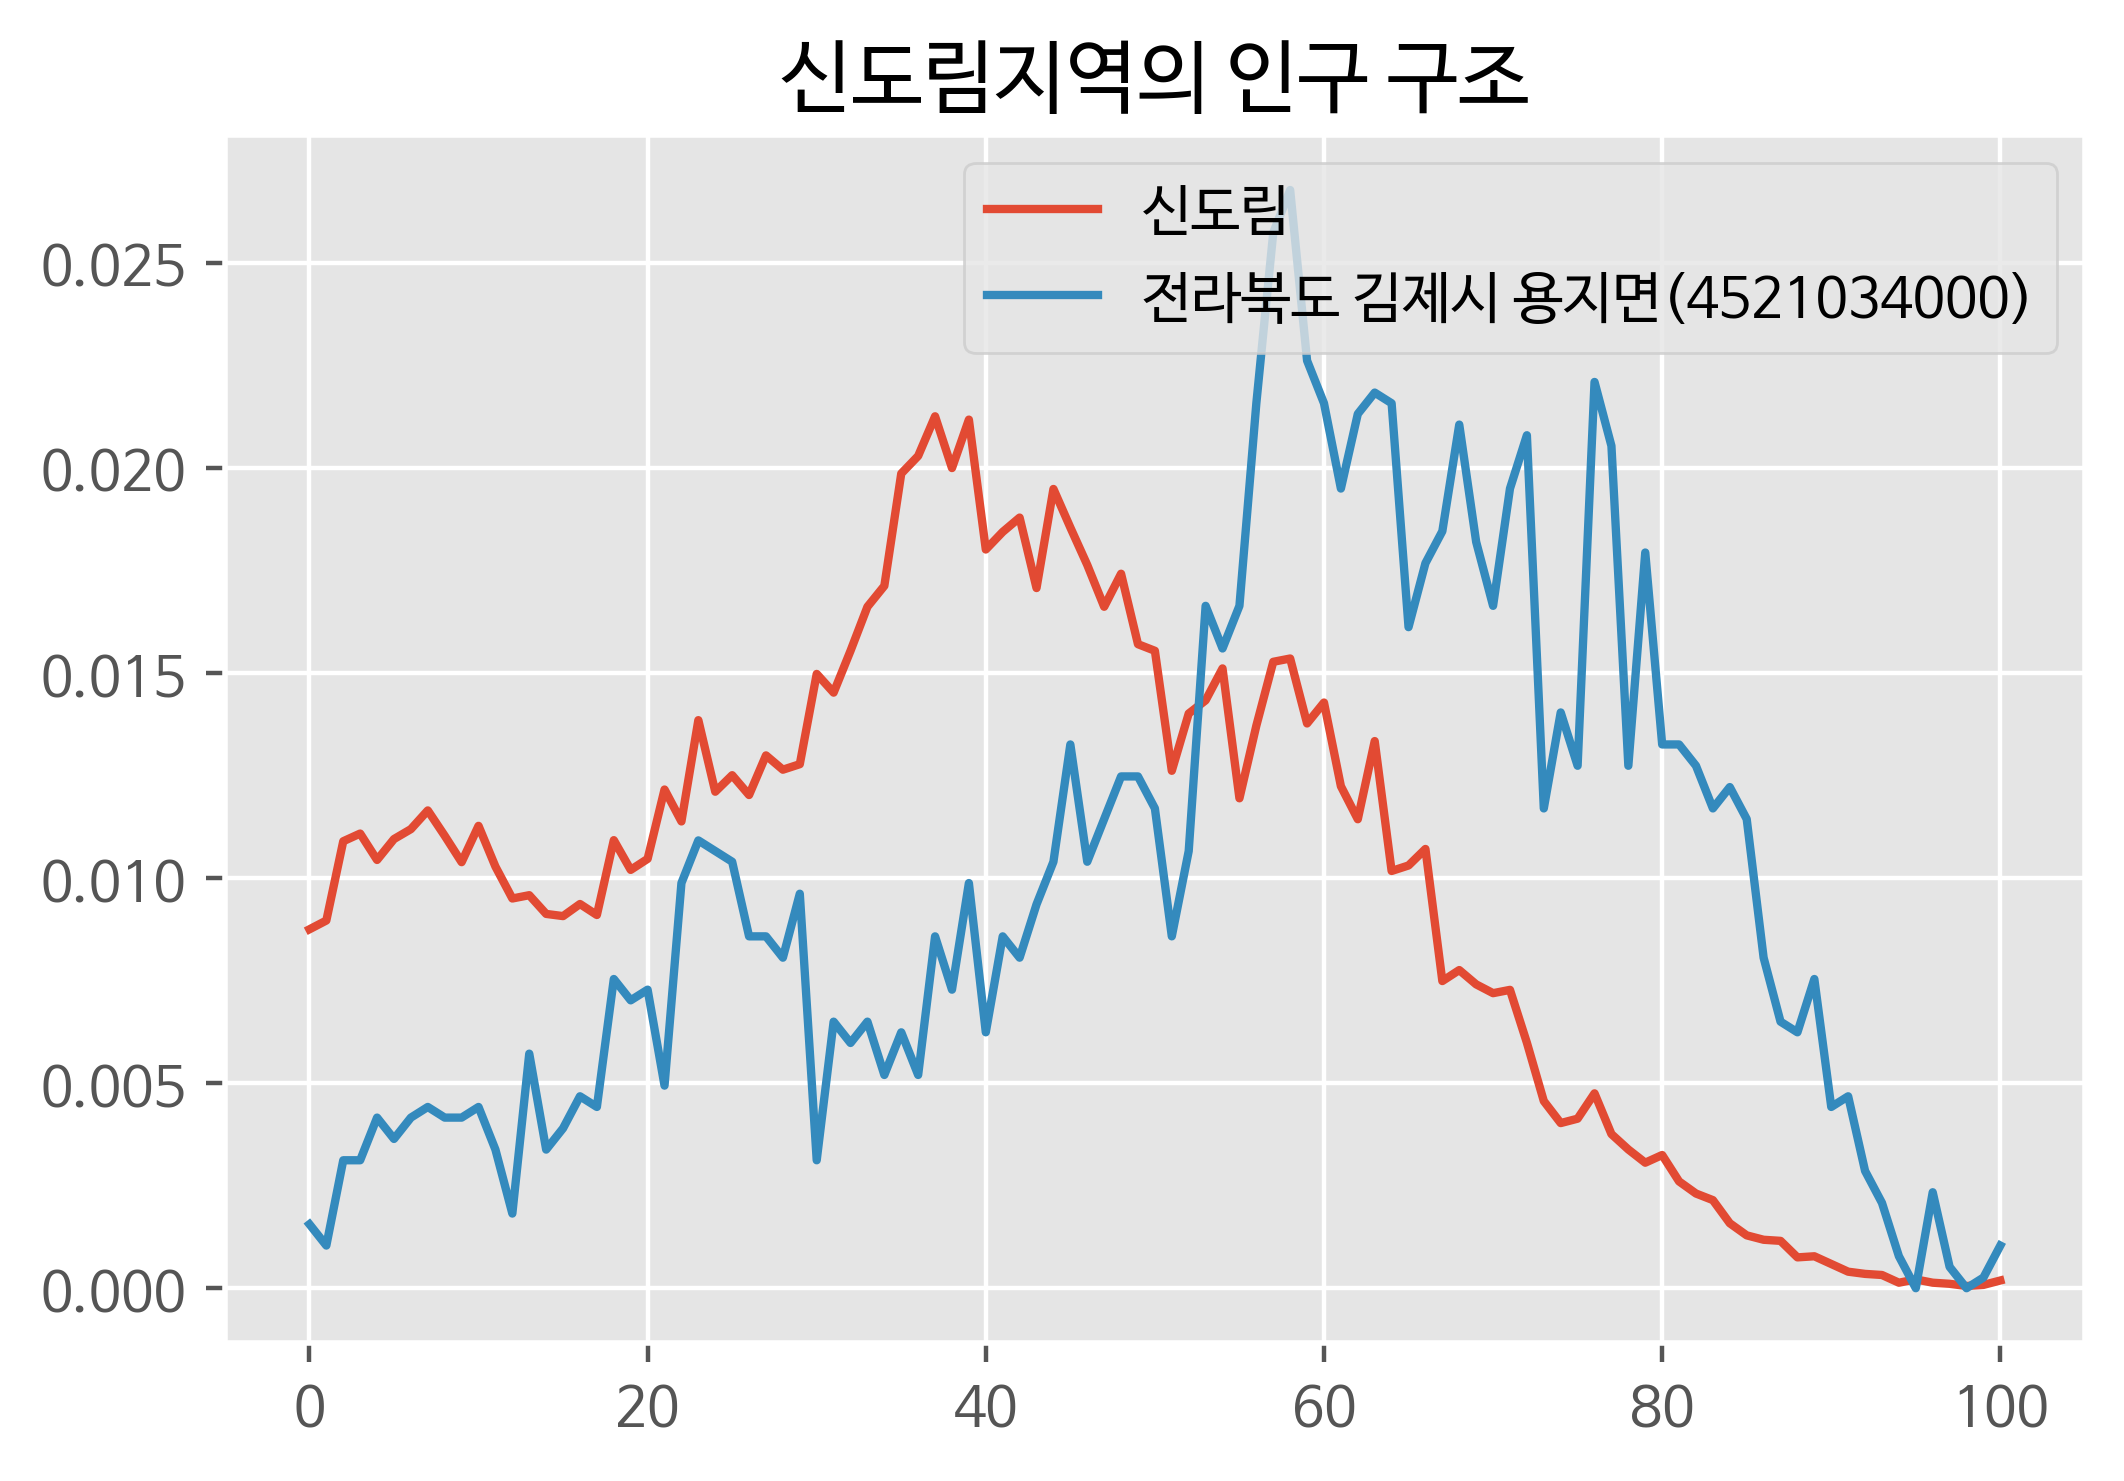

In [45]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('/content/age.csv',encoding='cp949') 
data = csv.reader(f)
next(data)

data = list(data) #추가

name = input('인구 구조가 알고싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 1 #최소값을 저장할 변수 
resname = '' #최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
res = 0     # 최소값을 갖는 지역의 연령대별 인구 비율 저장할 변수 생성 및 초기화

for row in data :
  if name in row[0]:
    home = np.array(row[3:],dtype=int) / int(row[2])

for row in data :
  away = np.array(row[3:],dtype=int) / int(row[2])
  s = np.sum(home-away)
  if s < mn :
    mn = s 
    resname = row[0]
    res = away #인구 비율 저장

#데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.title(name + '지역의 인구 구조')

plt.plot(home, label = name)
plt.plot(res,label = resname)
plt.legend()
plt.show()

우리가 찾고 있었던 것은 인구 구조가 가장 비슷한 지역 -> 즉 연령대별 인구 비율과 분포가 비슷해야 함<br>
두 지역의 차이가 합한 값이 0에 가까울 수록 인구 구조가 비슷 -> 음수 값이 선택됨<br>
거듭제곱 연산자를 통해 음수를 양수로 변환 처리 추가

인구 구조가 알고싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 영동


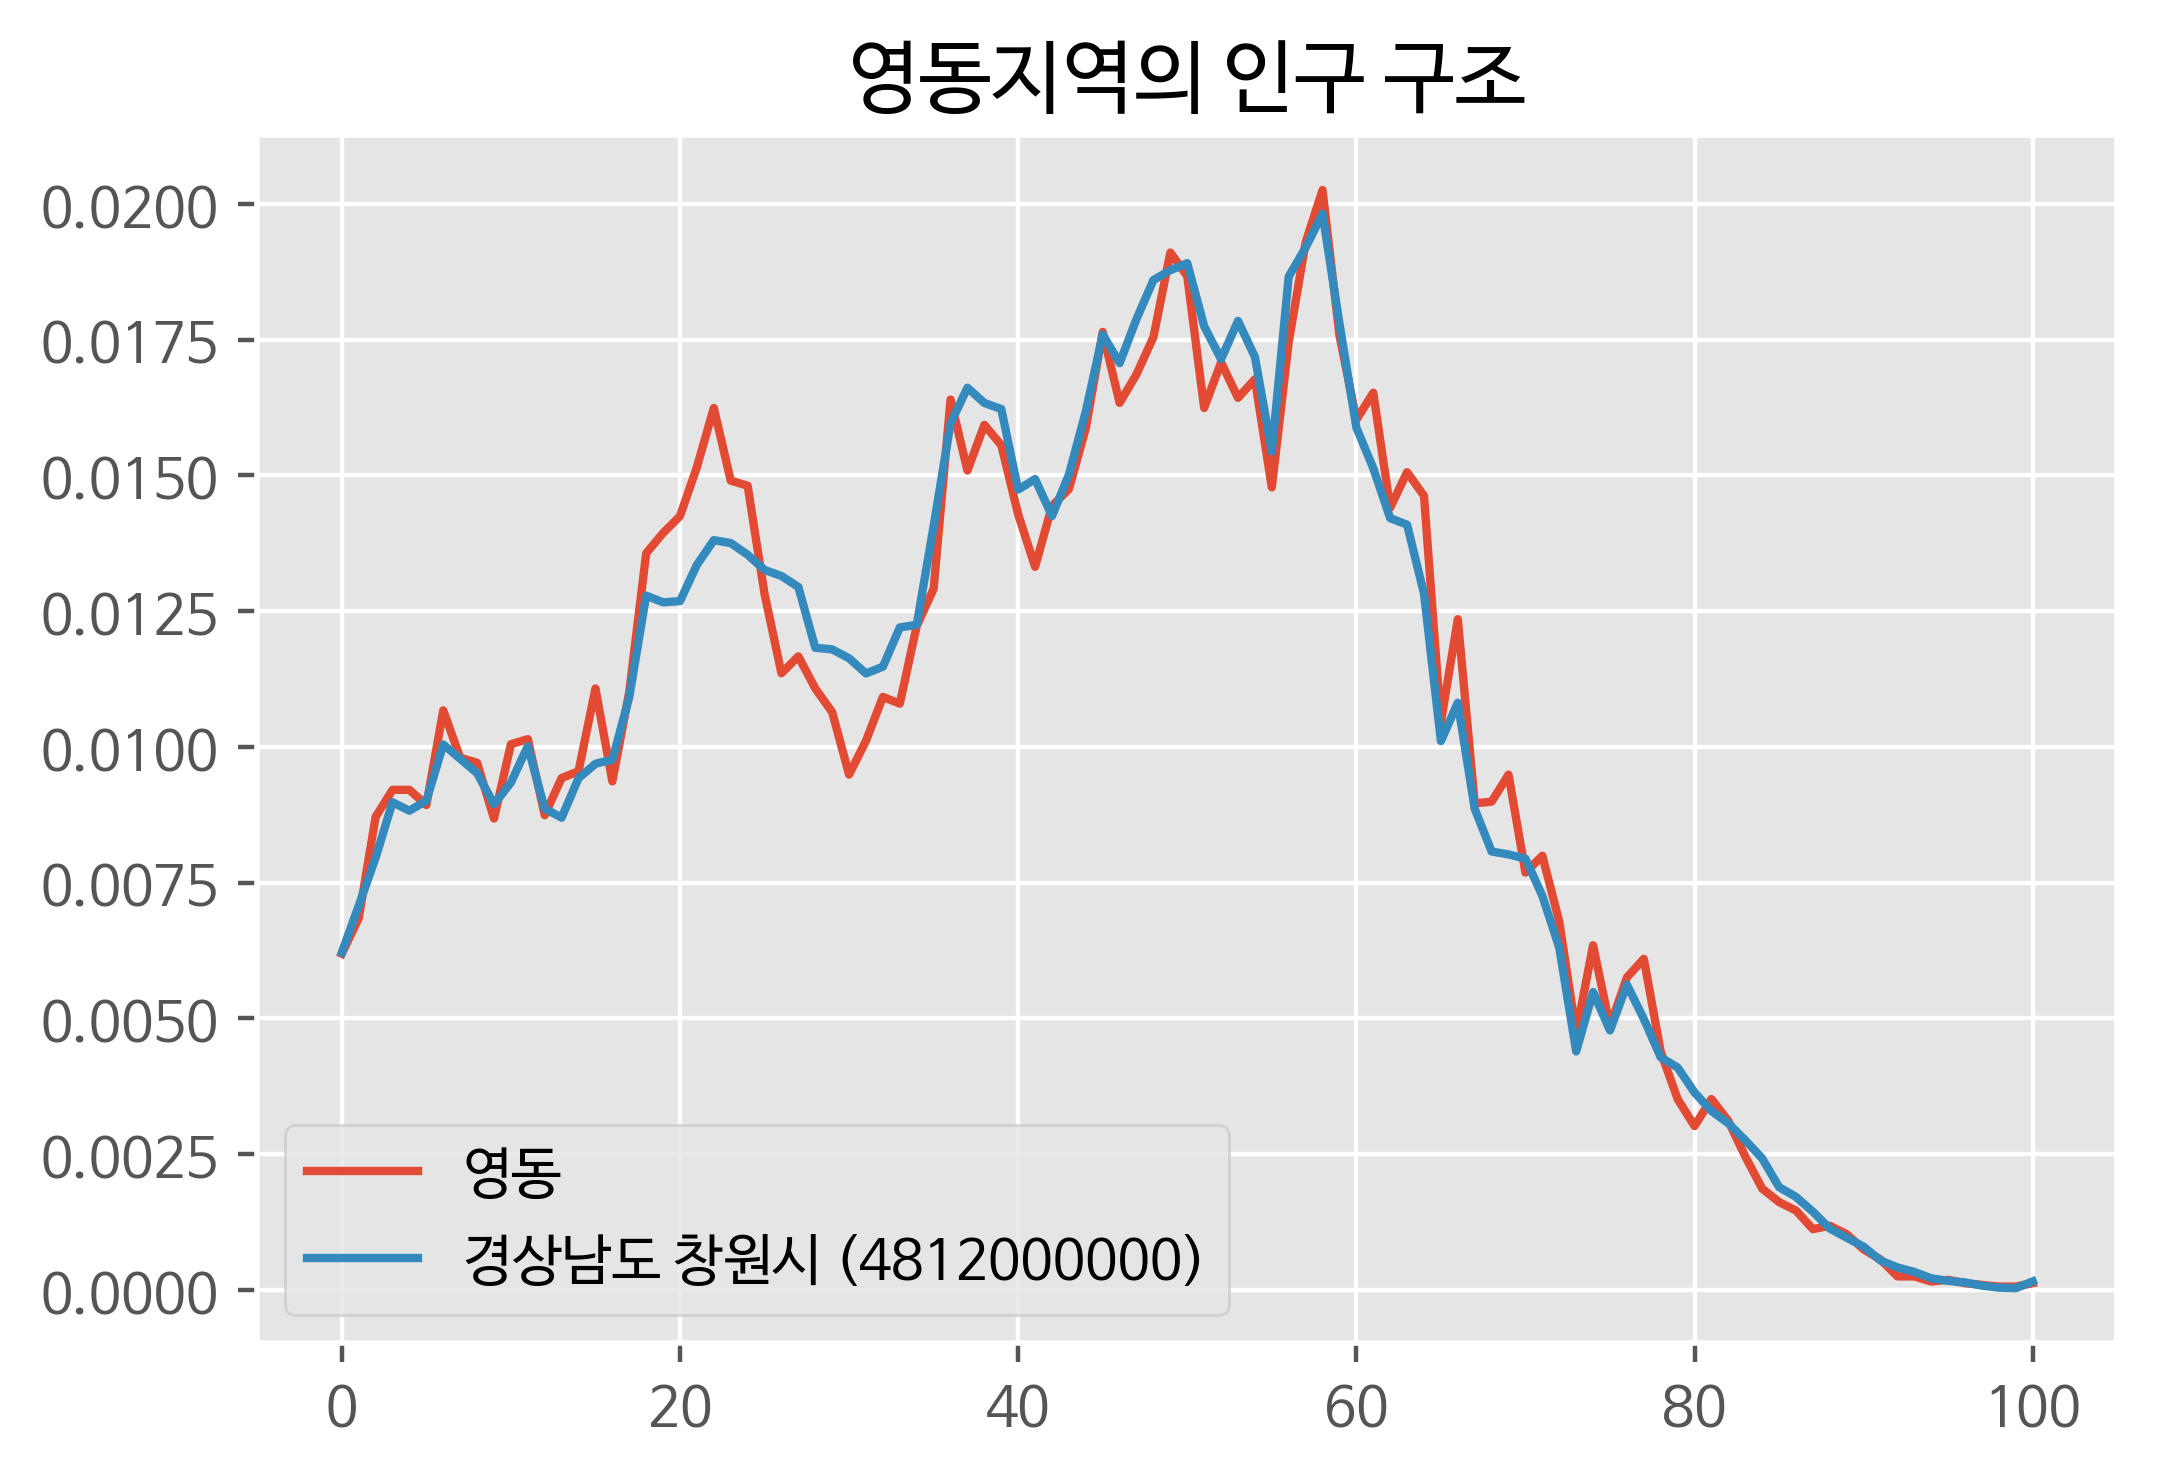

In [49]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('/content/age.csv',encoding='cp949') 
data = csv.reader(f)
next(data)

data = list(data) #추가

name = input('인구 구조가 알고싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 1 #최소값을 저장할 변수 
resname = '' #최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
res = 0     # 최소값을 갖는 지역의 연령대별 인구 비율 저장할 변수 생성 및 초기화

for row in data :
  if name in row[0]:
    home = np.array(row[3:],dtype=int) / int(row[2])

for row in data :
  away = np.array(row[3:],dtype=int) / int(row[2])
  s = np.sum((home-away) **2) # 음수 -> 앙수로 변환
  if s < mn and name not in row[0] :
    mn = s 
    resname = row[0]
    res = away #인구 비율 저장

#데이터 시각화
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.title(name + '지역의 인구 구조')

plt.plot(home, label = name)
plt.plot(res,label = resname)
plt.legend()
plt.show()